# Liste des modules

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.20,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip= True)

test_datagen = ImageDataGenerator()

In [3]:
path="/media/jhy/46AE-6494/DB/img/food/fruits-360/"

directory = path + 'Training'
Train = train_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

directory = path + 'Test'
Test = test_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [4]:
 label_map = (Train.class_indices)

In [5]:
print(label_map)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

In [6]:
# Load the pretained model
pretrained_model = keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [7]:
inputs = pretrained_model.input

x = keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = keras.layers.Dense(128, activation='relu')(x)


outputs = keras.layers.Dense(131, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

__.add_17[0][0]    
__________________________________________________________________________________________________
tf.math.multiply_17 (TFOpLambda (None, 1, 1, 672)    0           re_lu_28[0][0]                   
__________________________________________________________________________________________________
expanded_conv_11/squeeze_excite (None, 14, 14, 672)  0           multiply_12[0][0]                
                                                                 tf.math.multiply_17[0][0]        
__________________________________________________________________________________________________
expanded_conv_11/project (Conv2 (None, 14, 14, 112)  75264       expanded_conv_11/squeeze_excite/M
__________________________________________________________________________________________________
expanded_conv_11/project/BatchN (None, 14, 14, 112)  448         expanded_conv_11/project[0][0]   
_________________________________________________________________________________________

In [66]:
history = model.fit(
    Train,
    validation_data=Test,
    epochs = 50)

Epoch 1/50
2116/2116 [==============================] - 1174s 555ms/step - loss: 0.0238 - accuracy: 0.9960 - val_loss: 1.9865 - val_accuracy: 0.8127
Epoch 2/50
2116/2116 [==============================] - 1229s 581ms/step - loss: 0.0360 - accuracy: 0.9948 - val_loss: 0.2063 - val_accuracy: 0.9660
Epoch 3/50
2116/2116 [==============================] - 1156s 546ms/step - loss: 0.0331 - accuracy: 0.9953 - val_loss: 0.4761 - val_accuracy: 0.9311
Epoch 4/50
2116/2116 [==============================] - 1173s 554ms/step - loss: 0.0263 - accuracy: 0.9957 - val_loss: 0.2469 - val_accuracy: 0.9703
Epoch 5/50
2116/2116 [==============================] - 1273s 602ms/step - loss: 0.0346 - accuracy: 0.9954 - val_loss: 0.2882 - val_accuracy: 0.9587
Epoch 6/50
2116/2116 [==============================] - 1289s 609ms/step - loss: 0.0357 - accuracy: 0.9955 - val_loss: 0.1391 - val_accuracy: 0.9844
Epoch 7/50
2116/2116 [==============================] - 1146s 541ms/step - loss: 0.0357 - accuracy: 0.9949

In [37]:
history.history['val_accuracy']

[0.9241889715194702,
 0.9372355341911316,
 0.9833391904830933,
 0.7962799668312073,
 0.8680800199508667]

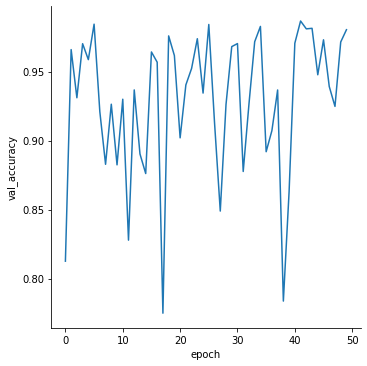

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
X = []
y = history.history['val_accuracy']
y2 = history.history['val_loss']
for x in range(len(y)):
    X.append(x)
ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_accuracy")
plt.show()


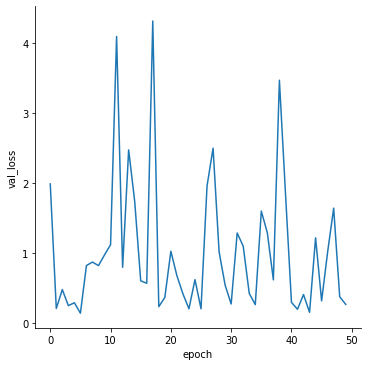

In [68]:
X = []
y = history.history['val_loss']
for x in range(len(y)):
    X.append(x)


ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_loss")
plt.show()

## TEST

In [69]:
def prediction (img_path,size = (224,224)):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img = image.load_img(img_path, target_size=size, color_mode = "rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    result = model.predict(x)
    y_classes = result.argmax(axis=-1)
    
    return y_classes

In [70]:
from IPython.display import Image

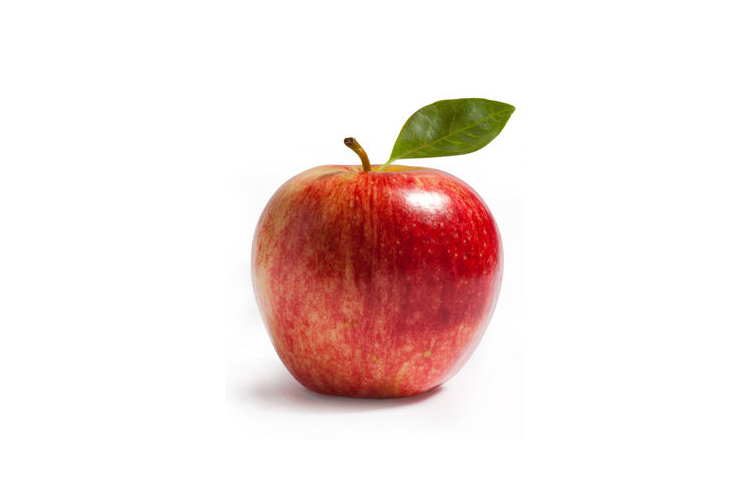

In [73]:
img_path="/media/jhy/46AE-6494/DB/img/food/Pomme/1.jpeg"
Image(filename=img_path)


In [74]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)


Cantaloupe 1


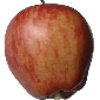

In [77]:
img_path="/media/jhy/46AE-6494/DB/img/food/fruits-360/Test-light/Apple Red 1/6_100.jpg"
Image(filename=img_path)

In [78]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Cantaloupe 1


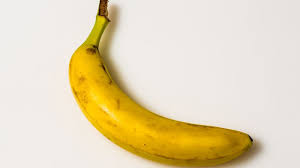

In [79]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/01.jpeg"
Image(filename=img_path)

In [80]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Cantaloupe 1


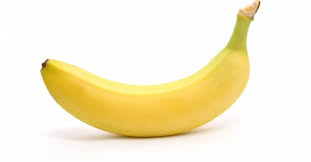

In [81]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/02.jpeg"
Image(filename=img_path)

In [82]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Cantaloupe 1


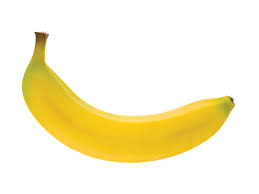

In [83]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/03.jpeg"
Image(filename=img_path)


In [84]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Cantaloupe 1


In [38]:
model.save('models/modele-prototype-131-Valpha')

INFO:tensorflow:Assets written to: models/modele-prototype-131-V3-heavy-goodpredict/assets


In [56]:
import pickle 

a_file = open("models/modele-prototype-131.pkl", "wb")

pickle.dump(label_map, a_file)

a_file.close()